In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df_tspa = pd.read_csv('../results/assignment4_tspa.csv')
df_tspb = pd.read_csv('../results/assignment4_tspb.csv')
tspa_npz = np.load('../results/TSPA_intra_edge_greedy_random.npz')
tspb_npz = np.load('../results/TSPB_intra_edge_greedy_random.npz')

In [92]:
from tsp import TSP


tspa_problem = TSP.from_csv("../data/" + "TSPA" + ".csv")
tspb_problem = TSP.from_csv("../data/" + "TSPB" + ".csv")

In [27]:
tspa_npz["sols"]

array([[ 18,  22, 146, ..., 159,  69, 108],
       [ 27,  90,  39, ..., 144,  21, 164],
       [112,  84, 184, ...,  10, 190,   4],
       ...,
       [ 97, 189,  94, ...,   2, 152,   1],
       [159, 193,  41, ...,  69,  18,  22],
       [ 65,  59, 118, ...,  42,  43, 116]])

In [28]:
from tsp import score

In [29]:
from tsp import score

score(tspa_npz["sols"][1], tspa_problem.D)

75565.0

In [30]:
sol1 = tspa_npz["sols"][1]
sol2 = tspa_npz["sols"][2]

In [31]:
sol2

array([112,  84, 184, 160,  43,  42, 181, 159, 193,  41, 115, 116, 105,
        47, 131, 149,  65,  59, 118,  51, 176,  80, 151,  72, 162, 133,
        79, 122,  63, 180, 135, 123, 127,  70, 154, 158,  53, 100,  26,
        86, 101,  75,   2,   1,  97, 152,  94, 124, 148, 167,  55,  57,
        92, 129, 120,  44,  78, 145,  31,  16, 171, 175, 113,  90, 165,
       119,  40, 185,  52, 106, 178,  49,  14, 144,  62,   9,  15, 186,
       137,  23,  89, 183, 143, 117,   0,  46,  68, 139, 108,  18,  22,
       146,  34,  48,  54,  30, 177,  10, 190,   4])

In [21]:
sol1 = np.zeros_like(sol2)
sol1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
sol1

array([ 27,  90,  39, 165,  40, 196, 145,  78, 113, 175, 171,  16,  25,
        44, 120,  75, 101,  86,  26, 100, 121,  53, 158, 180, 154, 135,
       127, 123, 162, 151, 118,  59, 116,  65,  47, 149, 131,  35, 184,
       177,  54,  48, 160,  34, 103, 146,  22, 159, 195, 181,  42,  43,
         5,  41, 193, 139, 115,  46,   0, 117, 143, 183,  89,  23,  51,
       176, 137, 186, 114,  15, 148, 167, 124,  94, 122,  80, 133,  79,
        63, 189, 152,  97,   1,   2, 129,  92,  57,  55,  52, 185, 106,
       178,   3,  14,  49,   9,  62, 144,  21, 164])

In [38]:
edges1 = np.sort(np.column_stack([sol1[:-1], sol1[1:]]), axis=1)
edges2 = np.sort(np.column_stack([sol2[:-1], sol2[1:]]), axis=1)

In [ ]:
# Convert edges to sets of tuples for comparison
edges1_set = set(map(tuple, edges1))
edges2_set = set(map(tuple, edges2))

# Find the intersection of the two sets and count the common edges
common_edges = edges1_set & edges2_set

In [42]:
len(common_edges)

40

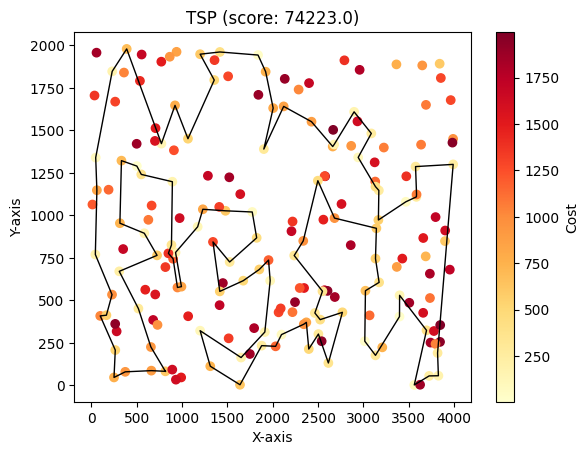

In [32]:
tspa_problem.visualize(sol2)

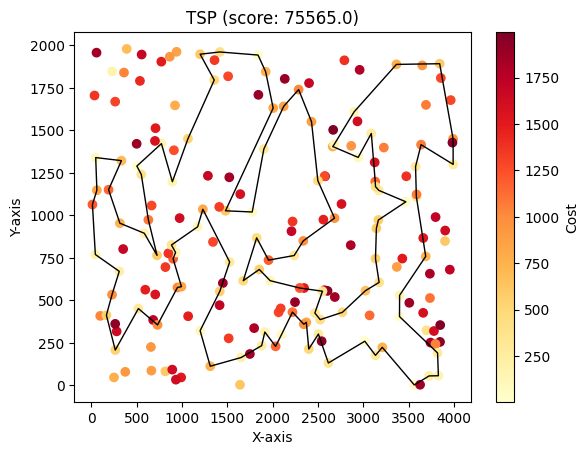

In [33]:
tspa_problem.visualize(sol1)

In [43]:
def similarity_common_nodes(sol1, sol2):
    return len(set(sol1).intersection(sol2))

def similarity_common_edges(solution1, solution2):
    # Convert solutions to NumPy arrays if not already
    solution1 = np.asarray(solution1)
    solution2 = np.asarray(solution2)
    
    # Get edges as sorted pairs of consecutive nodes
    edges1 = np.sort(np.column_stack([solution1[:-1], solution1[1:]]), axis=1)
    edges2 = np.sort(np.column_stack([solution2[:-1], solution2[1:]]), axis=1)
    
    # Convert edges to sets of tuples for comparison
    edges1_set = set(map(tuple, edges1))
    edges2_set = set(map(tuple, edges2))
    
    # Find the intersection of the two sets and count the common edges
    common_edges = edges1_set & edges2_set
    return len(common_edges)

In [50]:
similarity_common_edges(sol1,  tspa_npz["sols"][50])

43

In [70]:
df_tspa.iloc[655]

problem                        TSPA
method     intra_edge_greedy_random
i                               655
score                         70958
time                       0.145771
iter                            432
Name: 655, dtype: object

In [72]:
# tspa_npz["sols"][655]
score(tspa_npz["sols"][655], tspa_problem.D)

70958.0

In [63]:
df_best_tspa = df.iloc[655]

In [81]:
df_tspb.iloc[460]

problem                        TSPB
method     intra_edge_greedy_random
i                               460
score                         45584
time                       0.123397
iter                            412
Name: 460, dtype: object

In [84]:
score(tspb_npz["sols"][460], tspb_problem.D)

45584.0

In [93]:
new_df_tspa = df_tspa.drop(index=655)

In [102]:
new_df_tspb = df_tspb.drop(index=460)

In [103]:
new_df_tspb
new_df_tspa

,problem,method,i,score,time,iter
0,TSPB,intra_edge_greedy_random,0,48340,0.146884,406
1,TSPB,intra_edge_greedy_random,1,49013,0.125277,415
2,TSPB,intra_edge_greedy_random,2,48015,0.124840,398
3,TSPB,intra_edge_greedy_random,3,48627,0.119808,406
4,TSPB,intra_edge_greedy_random,4,48722,0.125233,412
...,...,...,...,...,...,...
996,TSPB,intra_edge_greedy_random,996,49363,0.157867,422
997,TSPB,intra_edge_greedy_random,997,47400,0.152834,409
998,TSPB,intra_edge_greedy_random,998,49143,0.151468,396
999,TSPB,intra_edge_greedy_random,999,48202,0.124529,408


In [104]:
df = new_df_tspa

In [ ]:
similarity = [similarity_common_nodes, similarity_common_edges]
mode = ["best", "average"]

In [105]:
from numba import njit

@njit(cache=False)
def s():
    similarity_matrix = np.zeros((len(df), len(df)))
    for i in range(1000):
        real_i = df.iloc[i]["i"]
        for j in range(1000):
            real_j = df.iloc[j]["i"]
            sim = similarity_common_nodes(tspa_npz["sols"][real_i], tspb_npz["sols"][real_j])
            similarity_matrix[i, j] = sim

KeyboardInterrupt: 

In [174]:
similarity_matrix = np.zeros((len(df), len(df)))
for i in range(1000):
    real_i = new_df_tspb.iloc[i]["i"]
    for j in range(1000):
        real_j = new_df_tspb.iloc[j]["i"]
        sim = similarity_common_nodes(tspb_npz["sols"][real_i], tspb_npz["sols"][real_j])
        similarity_matrix[i, j] = sim

In [144]:
similarity_matrix[:,460]

array([49., 52., 51., 47., 44., 53., 44., 52., 52., 43., 52., 45., 38.,
       44., 41., 50., 45., 42., 33., 41., 48., 44., 37., 47., 48., 43.,
       41., 50., 36., 39., 50., 43., 45., 45., 46., 43., 47., 44., 47.,
       45., 46., 44., 50., 51., 42., 50., 39., 40., 43., 35., 46., 41.,
       56., 43., 44., 45., 41., 37., 42., 46., 47., 39., 46., 34., 53.,
       44., 42., 40., 47., 46., 49., 53., 47., 43., 40., 44., 37., 49.,
       46., 44., 46., 40., 42., 39., 47., 36., 47., 45., 34., 54., 48.,
       56., 50., 44., 57., 40., 43., 43., 47., 36., 40., 47., 47., 36.,
       40., 50., 50., 40., 45., 50., 38., 48., 45., 48., 48., 44., 55.,
       45., 44., 43., 46., 41., 52., 46., 46., 51., 46., 47., 47., 38.,
       41., 44., 38., 51., 56., 47., 44., 43., 48., 44., 41., 42., 38.,
       41., 34., 46., 43., 39., 46., 47., 50., 49., 41., 51., 46., 44.,
       41., 46., 44., 48., 49., 47., 53., 38., 32., 49., 46., 47., 46.,
       38., 53., 45., 47., 47., 35., 44., 54., 45., 38., 38., 55

In [141]:
tspa_similarity_array_edges_best

array([52., 41., 41., 52., 57., 51., 62., 51., 40., 53., 61., 56., 52.,
       47., 47., 49., 56., 50., 49., 57., 50., 45., 47., 53., 45., 46.,
       44., 55., 52., 47., 57., 44., 44., 54., 45., 55., 45., 45., 51.,
       44., 56., 55., 46., 49., 52., 53., 46., 50., 54., 51., 49., 46.,
       50., 55., 50., 49., 50., 52., 52., 57., 51., 45., 40., 50., 51.,
       47., 54., 56., 54., 44., 62., 43., 47., 51., 56., 54., 44., 49.,
       53., 44., 50., 50., 54., 45., 55., 46., 52., 51., 53., 46., 51.,
       52., 48., 49., 51., 47., 49., 46., 50., 44., 52., 49., 51., 49.,
       49., 41., 43., 49., 40., 41., 55., 49., 53., 48., 45., 49., 48.,
       53., 59., 50., 48., 52., 55., 50., 48., 52., 53., 48., 44., 48.,
       40., 54., 42., 45., 44., 58., 47., 49., 54., 50., 53., 43., 50.,
       55., 51., 43., 52., 51., 44., 51., 50., 45., 48., 47., 44., 46.,
       54., 48., 42., 51., 51., 50., 53., 51., 57., 61., 40., 56., 58.,
       55., 54., 46., 47., 51., 50., 49., 58., 58., 55., 46., 50

In [142]:
tspa_similarity_array_nodes_best

array([91., 85., 88., 90., 91., 90., 92., 87., 88., 92., 93., 93., 86.,
       89., 89., 87., 91., 88., 90., 93., 94., 90., 87., 92., 86., 88.,
       87., 90., 87., 87., 93., 89., 86., 93., 91., 88., 88., 89., 88.,
       85., 90., 94., 83., 86., 88., 90., 90., 89., 91., 89., 89., 91.,
       88., 93., 89., 89., 89., 89., 91., 93., 91., 88., 88., 90., 89.,
       89., 93., 90., 90., 88., 94., 87., 88., 89., 94., 91., 90., 91.,
       91., 88., 89., 88., 92., 88., 93., 89., 91., 90., 91., 89., 92.,
       89., 89., 89., 90., 91., 88., 86., 92., 85., 88., 90., 92., 90.,
       90., 87., 88., 91., 88., 89., 92., 89., 89., 89., 88., 91., 88.,
       89., 89., 90., 92., 89., 90., 91., 90., 89., 89., 88., 88., 88.,
       88., 90., 84., 90., 92., 90., 86., 91., 90., 89., 95., 87., 90.,
       91., 90., 89., 89., 92., 87., 91., 88., 88., 89., 88., 89., 88.,
       90., 86., 87., 91., 91., 91., 90., 89., 91., 94., 89., 93., 92.,
       88., 92., 90., 88., 90., 91., 91., 90., 90., 91., 90., 92

In [149]:
tspb_similarity_array_nodes_best 

array([88., 86., 86., 83., 84., 87., 81., 90., 87., 84., 87., 85., 80.,
       88., 79., 83., 87., 81., 81., 79., 86., 85., 78., 86., 85., 81.,
       81., 87., 80., 77., 87., 81., 84., 81., 85., 85., 83., 83., 87.,
       81., 84., 81., 86., 85., 85., 84., 84., 79., 85., 77., 84., 77.,
       89., 84., 81., 81., 82., 76., 84., 84., 83., 84., 85., 78., 84.,
       84., 81., 80., 87., 83., 86., 85., 87., 85., 79., 80., 80., 86.,
       81., 83., 83., 82., 81., 82., 85., 81., 83., 86., 79., 85., 82.,
       89., 83., 82., 88., 84., 81., 82., 85., 75., 83., 83., 82., 81.,
       85., 87., 86., 79., 82., 89., 81., 87., 86., 87., 84., 83., 88.,
       89., 83., 84., 84., 84., 88., 86., 82., 87., 83., 88., 86., 77.,
       79., 82., 81., 84., 88., 82., 86., 80., 82., 83., 79., 82., 82.,
       84., 78., 84., 83., 82., 83., 85., 88., 89., 81., 88., 81., 84.,
       82., 85., 81., 83., 87., 83., 88., 78., 80., 82., 85., 84., 83.,
       87., 88., 85., 86., 83., 79., 80., 84., 83., 81., 83., 85

In [150]:
tspb_similarity_array_edges_best 

array([49., 52., 51., 47., 44., 53., 44., 52., 52., 43., 52., 45., 38.,
       44., 41., 50., 45., 42., 33., 41., 48., 44., 37., 47., 48., 43.,
       41., 50., 36., 39., 50., 43., 45., 45., 46., 43., 47., 44., 47.,
       45., 46., 44., 50., 51., 42., 50., 39., 40., 43., 35., 46., 41.,
       56., 43., 44., 45., 41., 37., 42., 46., 47., 39., 46., 34., 53.,
       44., 42., 40., 47., 46., 49., 53., 47., 43., 40., 44., 37., 49.,
       46., 44., 46., 40., 42., 39., 47., 36., 47., 45., 34., 54., 48.,
       56., 50., 44., 57., 40., 43., 43., 47., 36., 40., 47., 47., 36.,
       40., 50., 50., 40., 45., 50., 38., 48., 45., 48., 48., 44., 55.,
       45., 44., 43., 46., 41., 52., 46., 46., 51., 46., 47., 47., 38.,
       41., 44., 38., 51., 56., 47., 44., 43., 48., 44., 41., 42., 38.,
       41., 34., 46., 43., 39., 46., 47., 50., 49., 41., 51., 46., 44.,
       41., 46., 44., 48., 49., 47., 53., 38., 32., 49., 46., 47., 46.,
       38., 53., 45., 47., 47., 35., 44., 54., 45., 38., 38., 55

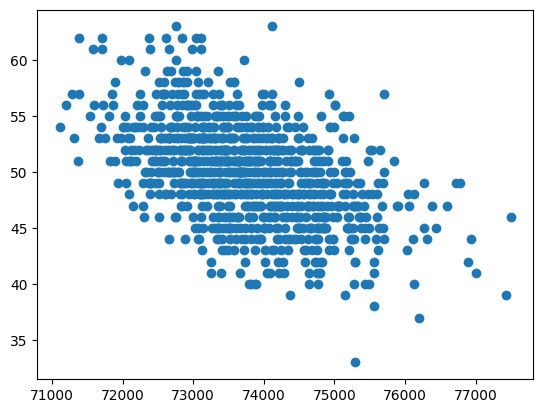

In [154]:
# plot the correlation between the scores and the similarity
tspb_similarity_array_edges_best, new_df_tspb["score"].values


plt.scatter(new_df_tspa["score"].values, tspa_similarity_array_edges_best)

Text(0, 0.5, 'Similarity')

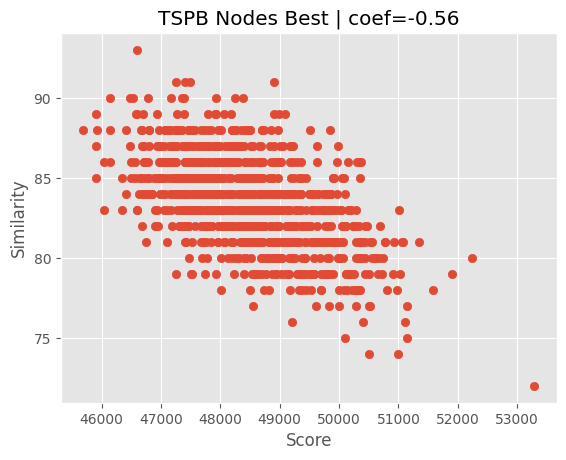

In [170]:
plt.style.use('ggplot')
y = tspb_similarity_array_nodes_best
x = new_df_tspb["score"].values

coef = pearsonr(x, y)
plt.scatter(x, y)
#add title and labels
plt.title(f"TSPB Nodes Best | coef={coef[0]:.2f}") 
plt.xlabel("Score")
plt.ylabel("Similarity")

In [163]:
#calculate correlation score
from scipy.stats import pearsonr

str(pearsonr(new_df_tspa["score"].values, tspa_similarity_array_edges_best)[0])

'-0.4897822909661806'